In [4]:
import matplotlib.pyplot as plt
import numpy as np

raw_data = np.genfromtxt('Bank_Personal_Loan_Modelling.csv',delimiter = ',', dtype=str);
#print(raw_data)
data = np.array(raw_data[1:51,0:4], dtype=float);
data.shape
#print(data)

(50, 4)

In [15]:
print(data[:5])

[[  1.  25.   1.  49.]
 [  2.  45.  19.  34.]
 [  3.  39.  15.  11.]
 [  4.  35.   9. 100.]
 [  5.  35.   8.  45.]]


In [16]:
# Normalized data
def normalized_data(data):
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    return (data - means) / stds

In [17]:
data_norm = normalized_data(data)
print(data_norm[:5])

[[-1.69774938 -1.88601088 -1.86997138 -0.56387976]
 [-1.62845348  0.03849002 -0.0266261  -0.88209633]
 [-1.55915759 -0.53886025 -0.43625838 -1.3700284 ]
 [-1.4898617  -0.92376043 -1.05070681  0.51805657]
 [-1.4205658  -0.92376043 -1.15311488 -0.64873751]]


In [22]:
# Extract y from data
headers = raw_data[0,:];
y_label = 'Income'
y_index = np.where(headers == y_label)[0][0]

#y = np.array([data_norm[:,y_index]]).T
y = data_norm[:,y_index]

#np.squeeze(y)
#y.shape
#list(y)


In [23]:
print(y[:5])

[-0.56387976 -0.88209633 -1.3700284   0.51805657 -0.64873751]


In [24]:
# Extract X from data

y_label = 'Income'
y_index = np.where(headers == y_label)[0][0]

X = np.array([data_norm[:,y_index]]).T


X = data_norm[:,0:y_index]

X = np.insert(X, 0, 1, axis=1)



In [25]:
print(X[:5,:])

[[ 1.         -1.69774938 -1.88601088 -1.86997138]
 [ 1.         -1.62845348  0.03849002 -0.0266261 ]
 [ 1.         -1.55915759 -0.53886025 -0.43625838]
 [ 1.         -1.4898617  -0.92376043 -1.05070681]
 [ 1.         -1.4205658  -0.92376043 -1.15311488]]


In [26]:
# create h function
def h(X,theta):
    y_predicted = np.dot(X,theta)
    return y_predicted

In [28]:
print(h(X, np.array([1, 2, 4, 5]))[:5])

[-19.28939915  -2.23607739  -6.4550481  -10.92829916 -11.30174773]


In [29]:
def cost(theta, X, y):
    d = (X@theta) - y
    J = (d.T @ d)/2
    return J

In [30]:
print(cost(np.array([1, 8, 10, 15]), X, y))

17797.406082147027


In [31]:
# Gradient of cost function
def gradient(X, y, theta):
    
    grad = X.T @ ((X @ theta) - y)
    return grad

In [33]:
print(gradient(X, y, np.array([1, 8, 10, 15])))

[  50.          461.91865586 1266.42201049 1273.15553399]


In [34]:
def gradient_descent(X, y, theta_initial, alpha, num_iters):
    J_per_iter = np.zeros(num_iters)
    gradient_per_iter = np.zeros((num_iters,len(theta_initial)))
    # initialize theta
    theta = theta_initial
    for iter in np.arange(num_iters):
        grad = gradient(X, y, theta)
        theta = theta - alpha * grad
        J_per_iter[iter] = cost(theta, X, y)
        gradient_per_iter[iter] = grad.T
    return (theta, J_per_iter, gradient_per_iter)

In [36]:
(theta, J_per_iter, gradient_per_iter) = gradient_descent(X, y, np.array([0, 1, 10, 100]), 0.001, 10)
print("theta:", theta)
print("J_per_iter:", J_per_iter)
print("gradient_per_iter", gradient_per_iter)

theta: [ 4.63984406e-15 -1.05211003e+00 -2.55451769e+01  6.40549550e+01]
J_per_iter: [245590.25072231 199213.86601034 161631.45061853 131175.06350824
 106493.1572945   86490.55754696  70279.82852472  57141.86520858
  46493.96129939  37863.93491214]
gradient_per_iter [[-8.95283847e-13  3.67373429e+02  5.46132992e+03  5.50211808e+03]
 [-6.89226454e-13  3.19395567e+02  4.91475957e+03  4.95530468e+03]
 [-5.68434189e-13  2.76768351e+02  4.42272665e+03  4.46305815e+03]
 [-7.56728014e-13  2.38929704e+02  3.97978774e+03  4.01993180e+03]
 [-4.51194637e-13  2.05375052e+02  3.58104282e+03  3.62102266e+03]
 [-3.48165941e-13  1.75651514e+02  3.22208102e+03  3.26191723e+03]
 [-3.30402372e-13  1.49352678e+02  2.89893177e+03  2.93864260e+03]
 [-1.24344979e-13  1.26113895e+02  2.60802087e+03  2.64762245e+03]
 [-2.16715534e-13  1.05608056e+02  2.34613090e+03  2.38563750e+03]
 [-2.59348099e-13  8.75417800e+01  2.11036561e+03  2.14978981e+03]]


In [37]:
def goodness_of_fit(y, y_predicted):
    # YOUR CODE HERE
    r_square =  np.absolute(1 - (((y - y_predicted) ** 2).sum() / ((y - 1/y_predicted) ** 2).sum()))
    return r_square

In [38]:
y_predicted =  h(X, theta)
r_square = goodness_of_fit(y, y_predicted)
print(r_square)

4.772939353034655


In [39]:
# Function to use the normal equations to find the optimal
# parameters for a linear regression model
from numpy.linalg import inv
def normal_equation(X, y):
    theta = inv(X.T @ X) @ X.T @ y
    return theta

In [40]:
theta_norm = normal_equation(X,np.array([y]).T)
print("theta from normal equation:", theta_norm.T)
y_norm_predicted =  h(X, theta_norm)
r_norm_square = goodness_of_fit(y, y_norm_predicted)
print("r_square:", r_norm_square)

theta from normal equation: [[ 5.55111512e-17  1.42132349e-01 -4.04722449e-01  3.20073061e-01]]
r_square: 0.999960841634185


In [46]:
theta_initial = np.zeros(X.shape[1],)
alpha = 0.003
iterations = 30000

theta, costs, grad = gradient_descent(X, y, theta_initial, alpha, iterations)


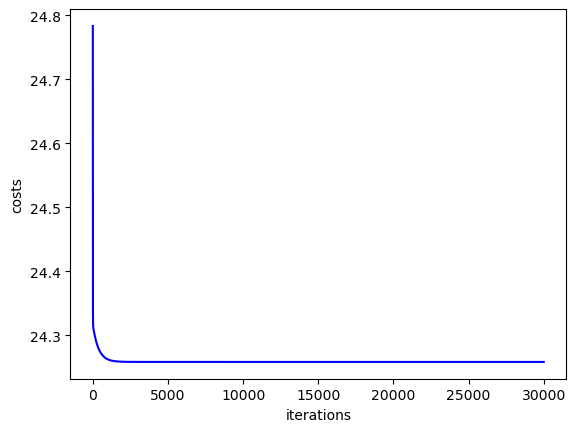

In [47]:

def cost_plot(iterations, costs):
    
    x_loss = np.arange(0, iterations, 1)
    plt.plot(x_loss, costs, 'b-')
    plt.xlabel('iterations')
    plt.ylabel('costs')
    plt.show()
    
cost_plot(iterations, costs)

My dataset, 'Bank_Personal_Loan_Modelling.csv' contains total data on 5000 customers. 
This data includes customer demographic information (age, income, etc.), 
the customer's relationship with the bank (mortgage, securities account, etc.), 
and the customer response to the last personal loan campaign (Personal Loan). 

I use the first four (ID, Age, Experience, Income) and 50 rows of the dataset. 
In this model, I predict income value based on the age and experience by using Linear Regression.


#Write a brief report on your experiments and results in the form of a Jupyter notebook.
===== A brief report of experiemnts and results =====

- slicing the first four features (ID, Age, Experience, Income) and only 50 samples from 5000 total data.
- normalize the data
- Extract X(ID, Age, Experience) and y(Income)data 
- create hypothesis 
- define cost function
-find gradient and gradient descent
To get goodness of fit by using r square
plotting the cost

Since r squred value is 0.99999, the model fits very well.

